## Assignment 5
--- 

### Course number : 
### Names of students working on notebook
--- 

* UNoga 1
* ungoya 2
* Ungoya 3


Questions 1,2,3 ( are here )
Question 4 ( Download the file and upload it to colab )


# Task 1
---

### Question 4:
Read csv

In [137]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# import sklean
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [138]:
## read the data into a DataFrame
df = pd.read_csv('Real estate.csv')

### Question 5:
Rename the fields in the realestate Data Frame to the names based on the table below. Print the results. Post a screenshot showing the code and results.

Rename the fields in the realestate Data Frame to the names based on the table below. Print the results. Post a screenshot showing the code and results.


newNames = ["no" , "date", "hage", "dstmrt", "nconvstr", "lat", "lon", "hprice"]



In [139]:
newNames = ["no" , "date", "hage", "dstmrt", "nconvstr", "lat", "lon", "hprice"]

## Change column names to newNames

df.columns = newNames
df.head()

,no,date,hage,dstmrt,nconvstr,lat,lon,hprice
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Question 6:
Check your dataset for any issues and clean it accordingly.  Provide a brief description of what you did to clean the dataset. Post a screenshot showing the code and the results.

In [140]:
## Check missing values

print( "MIssing values : " ,df.isnull().sum())
df.info()

MIssing values :  no          0
date        0
hage        0
dstmrt      0
nconvstr    0
lat         0
lon         0
hprice      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   no        414 non-null    int64  
 1   date      414 non-null    float64
 2   hage      414 non-null    float64
 3   dstmrt    414 non-null    float64
 4   nconvstr  414 non-null    int64  
 5   lat       414 non-null    float64
 6   lon       414 non-null    float64
 7   hprice    414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


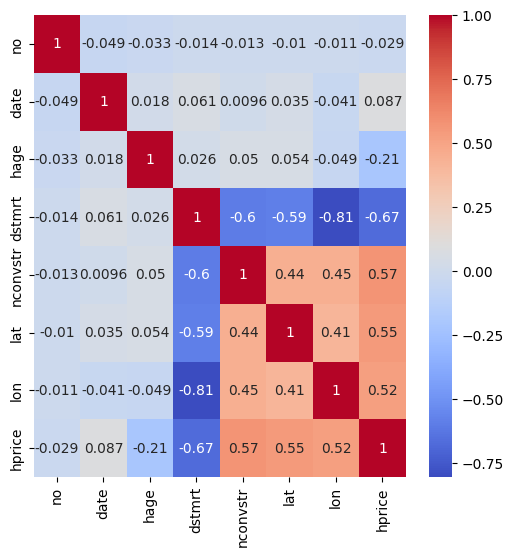

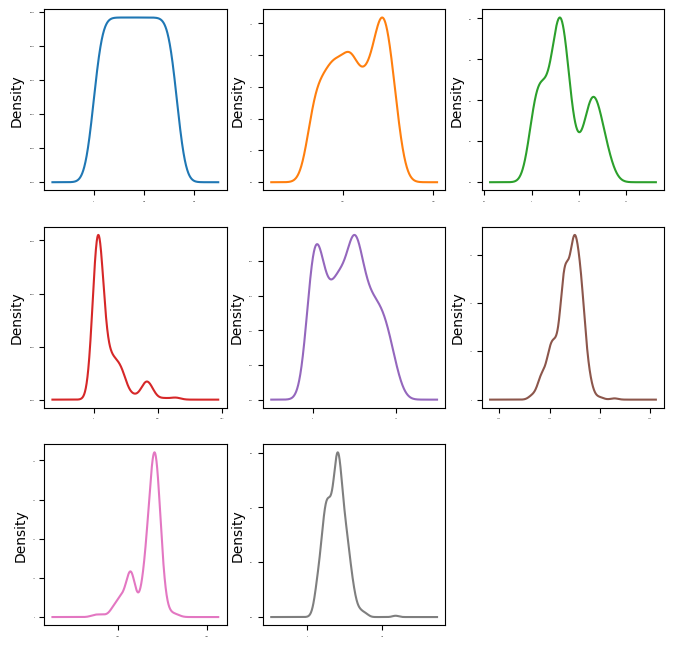

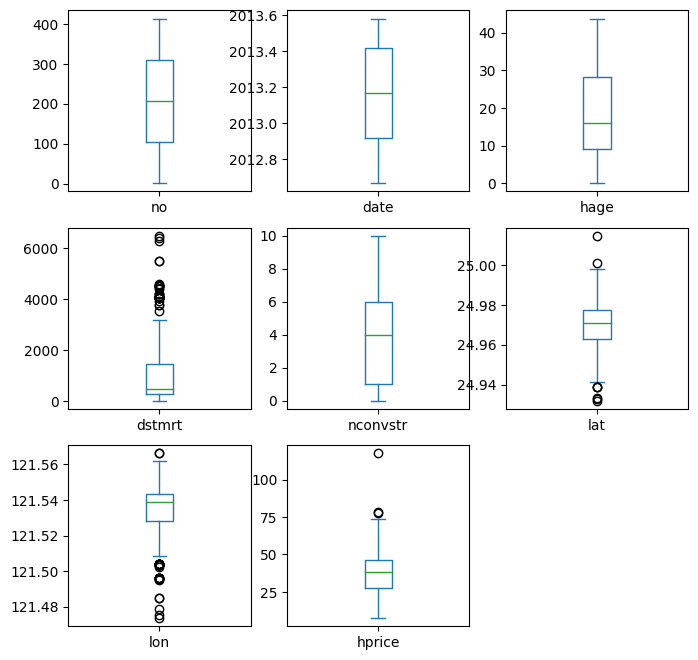

The shape of the dataset without outliers is  (398, 8)
Number of Outliers removed in the dataset is  16


In [141]:
## perform EDA on the data

## Check the correlation between the variables

corr = df.corr()

## plot the correlation matrix

plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Check the distribution of the variables

df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=False, fontsize=1, figsize=(8,8))
plt.show()

## Check for outliers using boxplot

df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(8,8))
plt.show()

## Remove outliers using interquartile range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

RangeForOutliers = 2.5 * IQR
indicesRowsWithoutOutliers = ((df < (Q1 - RangeForOutliers)) | (df > (Q3 + RangeForOutliers))).sum(axis=1) == 0


## get the dataset without outliers
datasetWithoutOutliers = df[indicesRowsWithoutOutliers]

print("The shape of the dataset without outliers is ", datasetWithoutOutliers.shape)
print("Number of Outliers removed in the dataset is ", df.shape[0] - datasetWithoutOutliers.shape[0])



### Question 7:

Briefly discuss the results of your EDA 

Ans:

**Data Cleaning**
* There were no missing values present
* All data types were properly set on the Dataframe

**EDA**

* There is max corelation between dstmrt and lon (Negative corelation , -0.81)
* Based on IQR , 16 datapoints were removed due to the presence of outlier. 
* dstmrt in the bix plot shows too many outliers

### Question 8:
Use the train_test_split function to create a training and test set for the realestate data frame. Set the outcome variable as hprice.  Use your understanding of the variables during the EDA process to decide which you think might be a good fit to predict hprice.  For the random_state set the value to the random number you generated at the beginning of the assignment. 

In [142]:
## test train split 

X = datasetWithoutOutliers.drop(['hprice'], axis=1)
y = datasetWithoutOutliers['hprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2864)


In [143]:
## remove the first two columns from the dataset

X_train_new = X_train.drop(['no', 'date'], axis=1)
X_test_new = X_test.drop(['no', 'date'], axis=1)

## scale the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new)
X_test_scaled = scaler.transform(X_test_new)



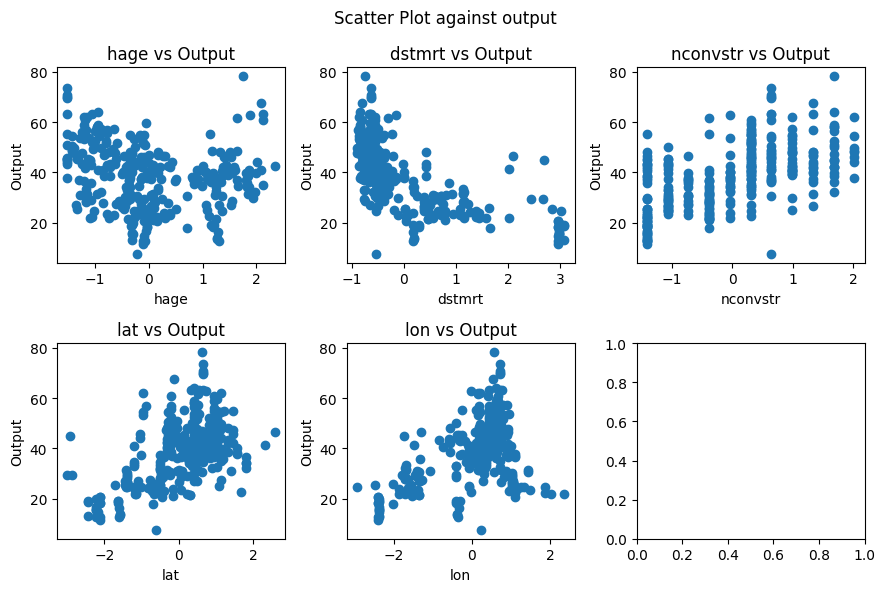

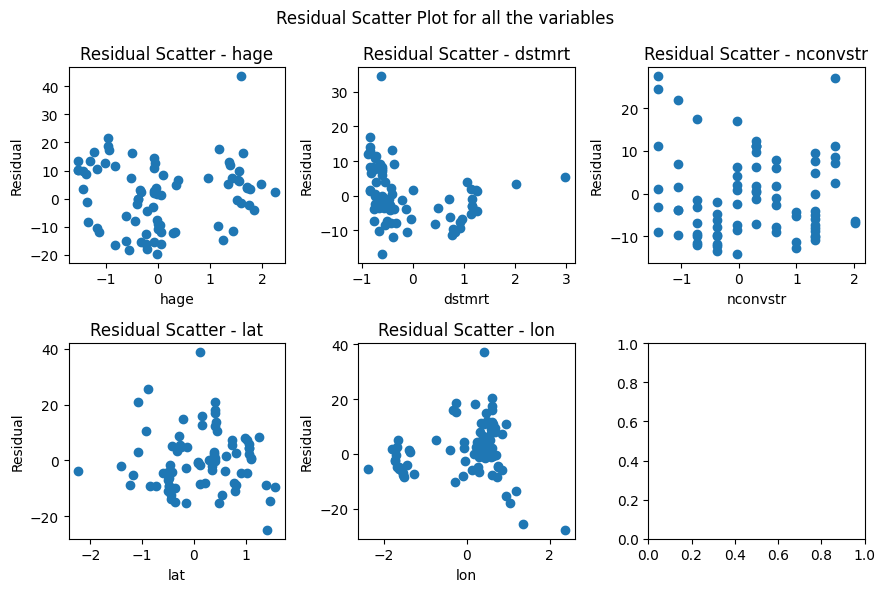

In [144]:
## Linear Regression model

## plot residual scatter plot for all the variables individually
fig, ax = plt.subplots(2,3,figsize=(9,6))
for i in range(0, X_test_scaled.shape[1]):
    ax[i//3, i%3].scatter(X_train_scaled[:,i], y_train)
    ax[i//3, i%3].set_xlabel(X_test_new.columns[i])
    ax[i//3, i%3].set_ylabel('Output')
    ax[i//3, i%3].set_title(f'{X_test_new.columns[i]} vs Output')
fig.suptitle('Scatter Plot against output')
plt.tight_layout()

## plot residual scatter plot for all the variables individually
fig, ax = plt.subplots(2,3,figsize=(9,6))
for i in range(0, X_test_scaled.shape[1]):
    model = LinearRegression()
    model.fit(X_train_scaled[:,i].reshape(-1,1), y_train)
    y_pred = model.predict(X_test_scaled[:,i].reshape(-1,1))
    ax[i//3, i%3].scatter(X_test_scaled[:,i], y_test - y_pred)
    ax[i//3, i%3].set_xlabel(X_test_new.columns[i])
    ax[i//3, i%3].set_ylabel('Residual')
    ax[i//3, i%3].set_title(f'Residual Scatter - {X_test_new.columns[i]}')
fig.suptitle('Residual Scatter Plot for all the variables')
plt.tight_layout()



In [148]:
## Generate the linear regression model

model = LinearRegression()


model.fit(X_train_scaled[:,1:4], y_train)
y_pred = model.predict(X_train_scaled[:,1:4])

## print RMSE and R2 score

print("RMSE is ", np.sqrt(mean_squared_error(y_train, y_pred)))
print("R2 score is ", r2_score(y_train, y_pred))

RMSE is  8.843186262832809
R2 score is  0.5200358286379242


### Question 9: 

First ensure that your model meets the following assumptions:
Independence of variables:  the data for different predictors that are independent of each other. Generally, is a factor in time-series data.
Linear relationship:  There is a linear relationship between the predictor variables and the outcome
Normality of errors:  Residuals are normally distributed.   
Homoscedasticity of errors: Residuals have a constant variance at each level of the predictor variable

Provide evidence showing that the model you will be running meets the 4 assumptions described above. 


Ans:

1, independance of variables test

There is no corelation between input features greater than 0.7 , There was high corelation between dismrt and lon, so we have removed that variable

2, Linear Relation Ship 

Based on the plots(scatter of input vs output), we can see that the variables, dismrt, nconvstr,lat have a linear relationship with the input and output. 

3, Normality Relationship

Based on the figure below, it shows a normal distribution, so the normality constraint is satisfied. Further,
Q-Q plots shows that the points lay close to a straight line. 

4, homoscedasticity

The residual vs predictedvalues shows random distribution without any pattern, so the homoscedasticity assumption is met

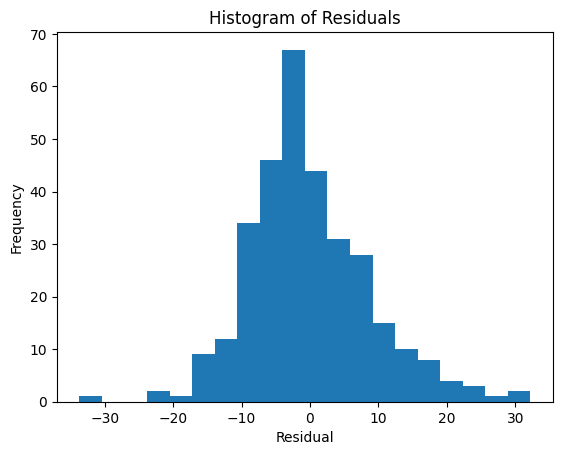

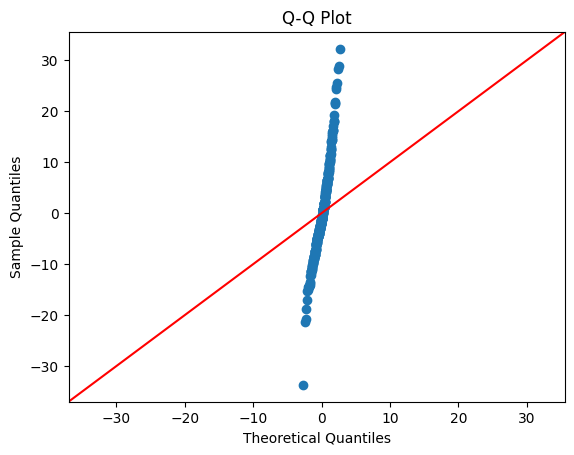

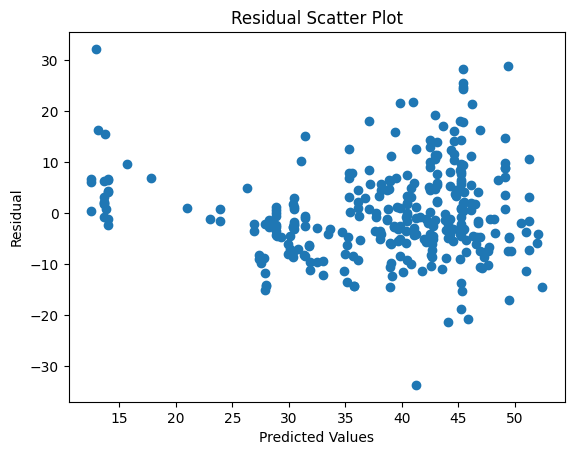

In [149]:
## histogram of the residuals

plt.hist(y_train - y_pred, bins=20)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

## plot Q-Q plot for the residuals

sm.qqplot(y_train - y_pred, line='45')
plt.title('Q-Q Plot')
plt.show()

## Scatter plot of the residuals against the predicted values

plt.scatter(y_pred, y_train - y_pred)
plt.xlabel('Predicted Values')
plt.ylabel('Residual')
plt.title('Residual Scatter Plot')
plt.show()


# Task 2
---

### Question 10

Create a cross validated multiple linear regression model that will predict the hprice in the realestate dataframe. Print the results. Post a screenshot showing the code and results.

In [161]:
## cross validation sklearn with scoring as RMSE and R2

# import cross_validate
from sklearn.model_selection import cross_validate


scores = cross_validate(model, X_train_new[["hage","dstmrt","nconvstr","lat"]], y_train ,cv=5, scoring=['neg_root_mean_squared_error','r2'])
print(scores["test_r2"])
print(scores["test_r2"].mean())

[0.56340563 0.54195224 0.53732851 0.45405369 0.66087411]
0.5515228337495275


### Question 11:

Compare the mean of the cross validated results to the results you obtained in assignment 4. Explain the differences and similarities.  

In [162]:
previous_scores = 0.5436

current_scores = scores["test_r2"].mean()

difference = current_scores - previous_scores

print("The difference in the scores is ", difference)

The difference in the scores is  0.007922833749527514


# Task 3
---


### Question 12

Rerun the cross validated model you created in question 10 but this time replacing the Linear Regression function with a Ridge regression function.  Set the alpha to 1. Print the results. Post a screenshot showing the code and results.

In [163]:
## Cross validation using ridge regression

## generate the ridge regression model

modelRidge = Ridge(alpha=1)

## fit the model
scoresRidge = cross_validate(modelRidge, X_train_new[["hage","dstmrt","nconvstr","lat"]], y_train,cv=5, scoring=['neg_root_mean_squared_error','r2'])

scoreBestRidge = scoresRidge["test_r2"].mean()

print("The best score for ridge regression is ", scoreBestRidge)


The best score for ridge regression is  0.5261917029155464


In [166]:
## Ridge regression with different values of alpha

alphas= [0.001, 0.01, 0.1, 1, 10, 100, 1000]

ridgeScores = []
for i in alphas:
    modelRidge = Ridge(alpha=i)
    scoresRidge = cross_validate(modelRidge, X_train_new[["hage","dstmrt","nconvstr","lat"]], y_train,cv=5, scoring=['neg_root_mean_squared_error','r2'])
    scoreBestRidge = scoresRidge["test_r2"].mean()
    ridgeScores.append(scoreBestRidge)
    print("The best score for ridge regression with alpha = ", i, " is ", scoreBestRidge)

print("The best score for ridge regression is ", max(ridgeScores))



The best score for ridge regression with alpha =  0.001  is  0.5518409894962372
The best score for ridge regression with alpha =  0.01  is  0.5512231805363077
The best score for ridge regression with alpha =  0.1  is  0.5357197688397306
The best score for ridge regression with alpha =  1  is  0.5261917029155464
The best score for ridge regression with alpha =  10  is  0.524899148770257
The best score for ridge regression with alpha =  100  is  0.5249060419869235
The best score for ridge regression with alpha =  1000  is  0.5163990424816479
The best score for ridge regression is  0.5518409894962372


### Question 14:

Rerun the cross validated model you created in question 10 but this time replacing the Linear Regression function with a Lasso regression function.  Set the alpha to 1. Print the results. Post a screenshot showing the code and results.

In [167]:
## cross validation using lasso regression alpha = 1

modelLasso = Lasso(alpha=1)

scoresLasso = cross_validate(modelLasso, X_train_new[["hage","dstmrt","nconvstr","lat"]], y_train,cv=5, scoring=['neg_root_mean_squared_error','r2'])

scoreBestLasso = scoresLasso["test_r2"].mean()

print("The best score for lasso regression is ", scoreBestLasso)


The best score for lasso regression is  0.5237980241995315


### Question 15

Rerun the Lasso regression model from question 14 but this time experiment with different alpha values. Print results that demonstrate an improvement over question 14. 

In [168]:
# lasso regression with different values of alpha

alphas= [0.001, 0.01, 0.1, 1, 10, 100, 1000]

lassoScores = []

for i in alphas:
    modelLasso = Lasso(alpha=i)
    scoresLasso = cross_validate(modelLasso, X_train_new[["hage","dstmrt","nconvstr","lat"]], y_train,cv=5, scoring=['neg_root_mean_squared_error','r2'])
    scoreBestLasso = scoresLasso["test_r2"].mean()
    lassoScores.append(scoreBestLasso)
    print("The best score for lasso regression with alpha = ", i, " is ", scoreBestLasso)

print("The best score for lasso regression is ", max(lassoScores))


print("The difference in the scores is ", max(lassoScores) - scoreBestLasso)

The best score for lasso regression with alpha =  0.001  is  0.5514197588231212
The best score for lasso regression with alpha =  0.01  is  0.5443930309238054
The best score for lasso regression with alpha =  0.1  is  0.5247222730258967
The best score for lasso regression with alpha =  1  is  0.5237980241995315
The best score for lasso regression with alpha =  10  is  0.4652924833473591
The best score for lasso regression with alpha =  100  is  0.41861225036513827
The best score for lasso regression with alpha =  1000  is  0.41483600125633924
The best score for lasso regression is  0.5514197588231212
The difference in the scores is  0.13658375756678198


### Question 16

Rerun the cross validated model you created in question 10 but this time replacing the Linear Regression function with a ElasticNet regression function.  Set the alpha to 1. Print the results. Post a screenshot showing the code and results.

In [169]:
## cross validation using elastic net regression

modelElastic = ElasticNet(alpha=1)

scoresElastic = cross_validate(modelElastic, X_train_new[["hage","dstmrt","nconvstr","lat"]], y_train,cv=5, scoring=['neg_root_mean_squared_error','r2'])

scoreBestElastic = scoresElastic["test_r2"].mean()

print("The best score for elastic net regression is ", scoreBestElastic)


The best score for elastic net regression is  0.5240578632156251


### Question 17


In [170]:
## elastic net regression with different values of alpha

alphas= [0.001, 0.01, 0.1, 1, 10, 100, 1000]

elasticScores = []

for i in alphas:
    modelElastic = ElasticNet(alpha=i)
    scoresElastic = cross_validate(modelElastic, X_train_new[["hage","dstmrt","nconvstr","lat"]], y_train,cv=5, scoring=['neg_root_mean_squared_error','r2'])
    scoreBestElastic = scoresElastic["test_r2"].mean()
    elasticScores.append(scoreBestElastic)
    print("The best score for elastic net regression with alpha = ", i, " is ", scoreBestElastic)

print("The best score for elastic net regression is ", max(elasticScores))


print("The difference in the scores is ", max(elasticScores) - scoreBestElastic)

The best score for elastic net regression with alpha =  0.001  is  0.5337523437905762
The best score for elastic net regression with alpha =  0.01  is  0.5255997047730122
The best score for elastic net regression with alpha =  0.1  is  0.5247647258202371
The best score for elastic net regression with alpha =  1  is  0.5240578632156251
The best score for elastic net regression with alpha =  10  is  0.4828487183994274
The best score for elastic net regression with alpha =  100  is  0.41852970634839626
The best score for elastic net regression with alpha =  1000  is  0.4181586859261192
The best score for elastic net regression is  0.5337523437905762
The difference in the scores is  0.11559365786445702


### Question 18

Discuss and compare the differences between the results from question 10, 13, 15 and 17. Which model performed better?

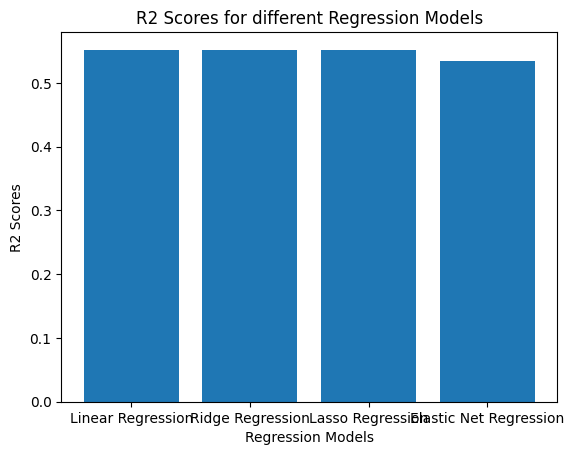

The best model is  Ridge Regression
The best score is  0.5518409894962372


In [171]:
## Compare the scores of the different models

scoresArray = [scores["test_r2"].mean(),  max(ridgeScores), max(lassoScores), max(elasticScores)]

# plot the scores
ModelArr = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net Regression']
plt.bar(['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net Regression'], scoresArray)
plt.xlabel('Regression Models')
plt.ylabel('R2 Scores')
plt.title('R2 Scores for different Regression Models')
plt.show()

## get the best model

bestModelIndex = np.argmax(scoresArray)

print("The best model is ", ModelArr[bestModelIndex])
print("The best score is ", scoresArray[bestModelIndex])

# Task 4
---

### Question 19

Rerun the cross validated model you created in question 10 but this time replacing the Linear Regression function with a PLSRegession function.  Set the alpha to a value appropriate based on the number of variables in your model. Print the results. Post a screenshot showing the code and results.

In [172]:
from sklearn.cross_decomposition import PLSRegression
plsAlgorithm= PLSRegression(n_components=2)

## cross validation using PLS regression

scoresPLS = cross_validate(plsAlgorithm, X_train_new[["hage","dstmrt","nconvstr","lat"]], y_train,cv=5, scoring=['neg_root_mean_squared_error','r2'])

scoreBestPLS = scoresPLS["test_r2"].mean()

print("The best score for PLS regression is ", scoreBestPLS)

The best score for PLS regression is  0.5569122061735229


## Question 20



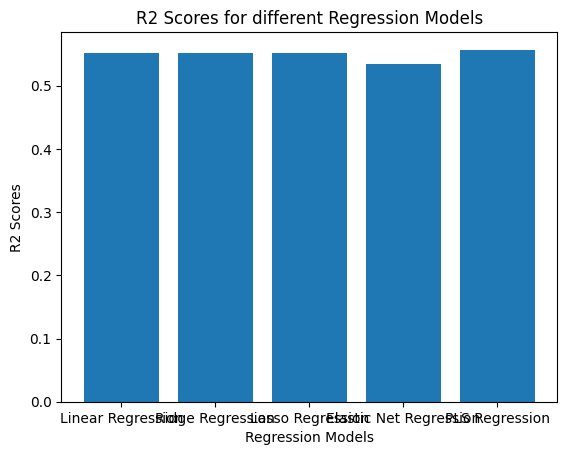

The best model is  PLS Regression
The best score is  0.5569122061735229


In [173]:
## Compare the scores of the different models

scoresArray = [scores["test_r2"].mean(),  max(ridgeScores), max(lassoScores), max(elasticScores) ,scoreBestPLS]

# plot the scores
ModelArr = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net Regression',"PLS Regression"]
plt.bar(ModelArr, scoresArray)
plt.xlabel('Regression Models')
plt.ylabel('R2 Scores')
plt.title('R2 Scores for different Regression Models')
plt.show()

## get the best model

bestModelIndex = np.argmax(scoresArray)

print("The best model is ", ModelArr[bestModelIndex])
print("The best score is ", scoresArray[bestModelIndex])

### Question 21

Rerun the cross validated model you created in question 10 but this time replacing the Linear Regression function with the PCR.  You do not have to specify a specific number of components unless you feel it will provide better results. Print the results. Post a screenshot showing the code and results.

In [174]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA(n_components=4)
pcaPredictors = pca.fit_transform(scale( X_train_new[["hage","dstmrt","nconvstr","lat"]]))

## cross validation using PCA

scoresPCA = cross_validate(model, pcaPredictors, y_train,cv=5, scoring=['neg_root_mean_squared_error','r2'])

scoreBestPCA = scoresPCA["test_r2"].mean()

print("The best score for PCA regression is ", scoreBestPCA)

The best score for PCA regression is  0.551522833749537


### Question 22

Compare these results to the ones you ran for previous models.  How do these results compare?

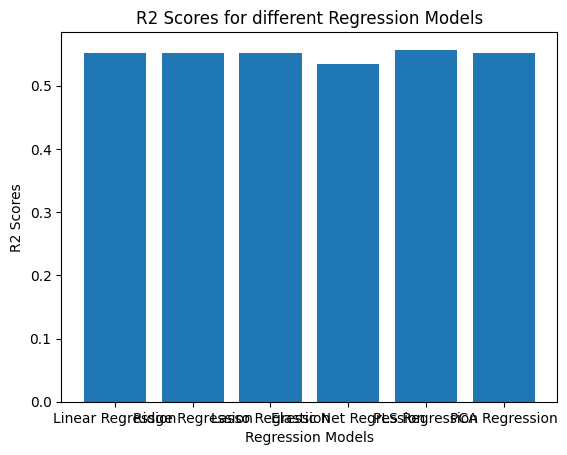

The best model is  PLS Regression
The best score is  0.5569122061735229


In [175]:
## Compare the scores of the different models

scoresArray = [scores["test_r2"].mean(),  max(ridgeScores), max(lassoScores), max(elasticScores) ,scoreBestPLS,scoreBestPCA]

# plot the scores

ModelArr = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net Regression',"PLS Regression","PCA Regression"]
plt.bar(ModelArr, scoresArray)
plt.xlabel('Regression Models')
plt.ylabel('R2 Scores')
plt.title('R2 Scores for different Regression Models')
plt.show()

## get the best model

bestModelIndex = np.argmax(scoresArray)

print("The best model is ", ModelArr[bestModelIndex])
print("The best score is ", scoresArray[bestModelIndex])

# Task 5 
---

### Question 23

Select the best performing model from the previous results.  Rerun the model but this time instead of using the training data set.  Use your test data set.  Print the results and post a screenshot.

In [176]:
## Best model is PLS regression

plsAlgorithm= PLSRegression(n_components=2)

plsAlgorithm.fit(X_train_new[["hage","dstmrt","nconvstr","lat"]], y_train)

y_pred = plsAlgorithm.predict(X_test_new[["hage","dstmrt","nconvstr","lat"]])

print("The R2 score for the test data is ", r2_score(y_test, y_pred))
print("The RMSE for the test data is ", np.sqrt(mean_squared_error(y_test, y_pred)))


The R2 score for the test data is  0.6179643418000551
The RMSE for the test data is  7.329193558190289


### Question 24 

Compare the models results from the training set to the models results on the test set. How different is the model performance?  Does this validate your expectations based on the results from training your model?

The R2 score for the training data is  0.5773324033420298
The RMSE for the training data is  8.298581054764313


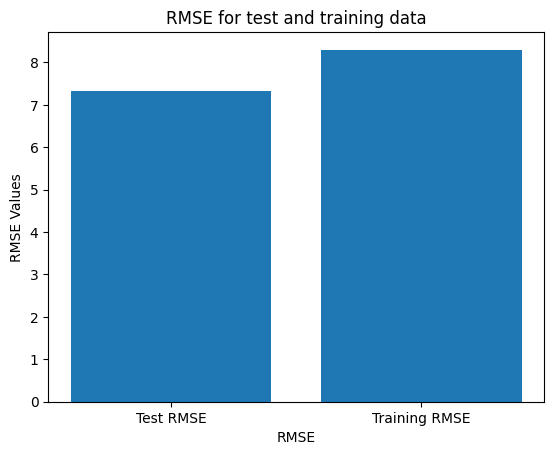

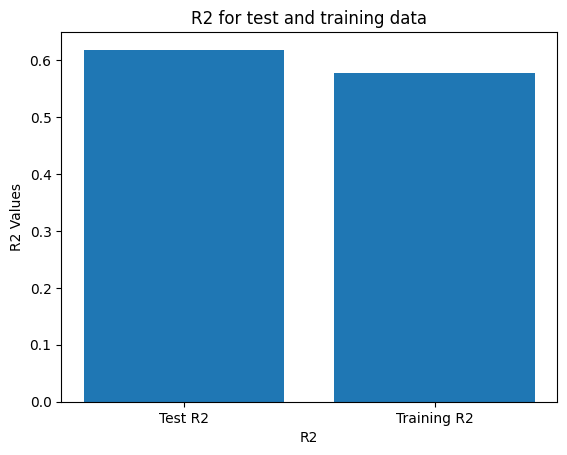

In [178]:
## compare the test RMSE with training RMSE

y_pred_train = plsAlgorithm.predict(X_train_new[["hage","dstmrt","nconvstr","lat"]])

print("The R2 score for the training data is ", r2_score(y_train, y_pred_train))
print("The RMSE for the training data is ", np.sqrt(mean_squared_error(y_train, y_pred_train)))

## plot test RMSE vs training RMSE in bar plot

RMSEArray = [np.sqrt(mean_squared_error(y_test, y_pred)), np.sqrt(mean_squared_error(y_train, y_pred_train))]
plt.bar(['Test RMSE', 'Training RMSE'], RMSEArray)
plt.xlabel('RMSE')
plt.ylabel('RMSE Values')
plt.title('RMSE for test and training data')
plt.show()

## plot test R2 vs training R2 in bar plot

R2Array = [r2_score(y_test, y_pred), r2_score(y_train, y_pred_train)]
plt.bar(['Test R2', 'Training R2'], R2Array)
plt.xlabel('R2')
plt.ylabel('R2 Values')
plt.title('R2 for test and training data')
plt.show()


# Task 6


Compare the models results from the training set to the models results on the test set. How different is the model performance?  Does this validate your expectations based on the results from training your model?